# Code to perform the analysis on Desert Dust (DD) events for every station.
## With coefficient obtained from the first period (01-09-23, 31-08-24) of data collected at Lampedusa site.
### Desert Dust filter
- AOD: $\ge$ 0.15
- ANG: $\le$ 0.5
### ODR Coefficients found in the first period
- IMP1F: 1.33 $\pm$ 0.22 
- IMP2F: 1.35 $\pm$ 0.21

In [130]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n): # n is the number of observations and p the parameters of the fit (slope and intercept)
    p = 2
    if len(y_true) < 2 or len(y_pred) < 2:
        # Return NaNs or zeros if not enough data
        return [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
    else:

        # Calculate Bias
        bias = np.mean(y_true - y_pred)

        # Calculate Correlation
        corr, _ = pearsonr(y_true, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))

        # Calculate NMSE
        mse = np.mean((y_true - y_pred) ** 2)
        var_y = np.var(y_true)

        # Calculate r2 (coefficient of determination)
        ss_res = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan  # Avoid division by zero

        # Calculate Adjusted r2
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1)) if (n - p - 1) != 0 else np.nan  # Avoid division by zero

        return bias, corr, rmse, var_y, mse, r2, adj_r2

import matplotlib.pyplot as plt
import numpy as np

def plot_scatter(df, columns, cmap="plasma", stats=True, name="Name Station"):
    """
    Plots 6 subplots (2x3) from specified columns of a DataFrame with a shared colorbar.

    Parameters:
    - df: pandas DataFrame
    - columns: list of 6 column names, 
               columns[0] = observations,
               columns[1:5] = model predictions,
               columns[5] = angstrom values (for color)
    - cmap: colormap for scatter plot color
    - stats: boolean, whether to display statistical indexes on each subplot
    - name: station name (used as plot title)
    """

    if len(columns) != 6:
        raise ValueError("You must provide exactly 6 column names.")

    obs = df[columns[0]]
    ang = df[columns[5]]

    f, axs = plt.subplots(2, 2, figsize=(15, 8), constrained_layout=True, sharex=True, sharey=True)
    axs = axs.flatten()
    plt.suptitle(name, fontsize=16, fontweight='bold', x= 0.45)

    # Normalize color scale for the angstrom values
    norm = plt.Normalize(vmin=ang.min(), vmax=ang.max())

    for i, ax in enumerate(axs):
        pred = df[columns[i+1]]

        # Scatter plot with colors based on angstrom and colormap
        sc = ax.scatter(obs, pred, c=ang, cmap=cmap, norm=norm, edgecolor='k', alpha=0.8)

        min_val = min(obs.min(), pred.min())
        max_val = max(obs.max(), pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1)

        #ax.set_xlabel(f"Obs ({columns[0]})")
        #ax.set_ylabel(f"Mod ({columns[i]})")
        ax.set_title(columns[i+1])
        #ax.set_aspect('equal', adjustable='box')
        ax.grid(True)

        if stats:
            metrics = calculate_metrics(obs, pred, len(obs))
            stat_text = (f"Bias: {metrics[0]:.3f}\n"
                         f"Corr: {metrics[1]:.3f}\n"
                         f"RMSE: {metrics[2]:.3f}\n"
                         fr"$R^2$: {metrics[5]:.3f}")
            ax.text(0.15, 0.77, stat_text,
                    transform=ax.transAxes,
                    fontsize=9, color='black',
                    ha='right', va='bottom',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    # Create a single colorbar for all subplots
    f.supxlabel(r"Obs ($\tau$)", fontsize=14, x=0.45)
    cbar = f.colorbar(sc, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label(r"$\alpha_{440-870}$", fontsize=14)

    plt.show()

aleria_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/aleria_df.csv")
aosta_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/aosta_df.csv")
apulian_tavoliere_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/apulian tavoliere_df.csv")
capo_granitola_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/capo granitola_df.csv")
ersa_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/ersa_df.csv")
lampedusa_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/lampedusa_df.csv")
modena_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/modena_df.csv")
napoli_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/napoli_df.csv")
potenza_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/potenza_df.csv")
roma_la_sapienza_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/roma la sapienza_df.csv")
roma_tor_vergata_df = pd.read_csv("/home/andrea/enea_project/lmp_dust_enea/DD_data_stations/roma tor vergata_df.csv")


# **Aleria station**

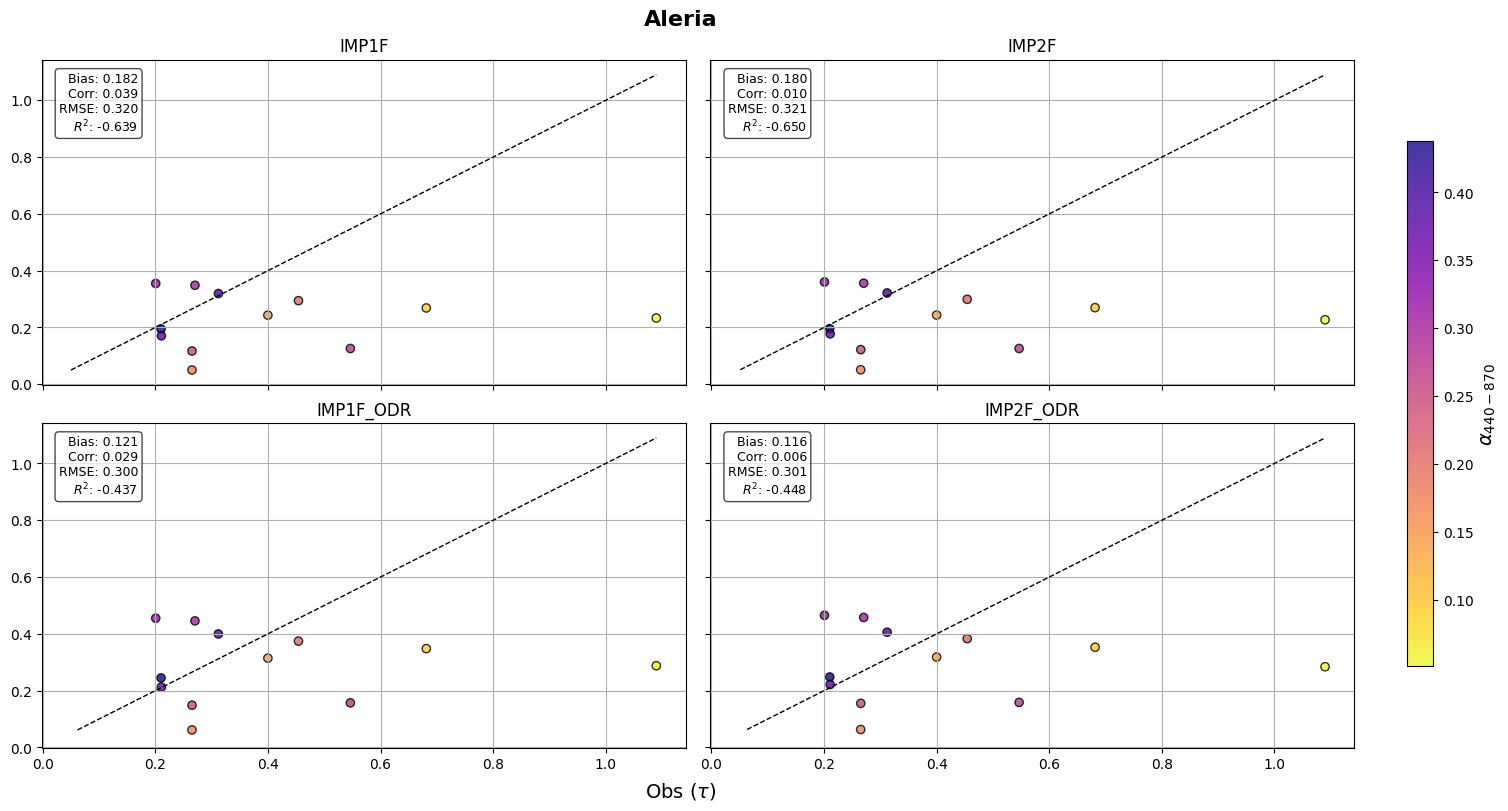

In [131]:
# Periods of time: the first one will be used to evalueate new coefficients to use in IMPROVE formula and the second will be use as test
start_1_aleria = pd.to_datetime(aleria_df['time'].iloc[0])
end_1_aleria = pd.Timestamp("2023-12-31 23:59:59")
start_2_aleria = pd.Timestamp("2024-01-01 00:00:00")
end_2_aleria = pd.to_datetime(aleria_df['time'].iloc[-1])

# DD events
aleria_dd = aleria_df[(aleria_df['LMP'] >= 0.15) & (aleria_df['ang_440_870'] <= 0.5)]
plot_scatter(
    aleria_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Aleria")

# **Aosta station**

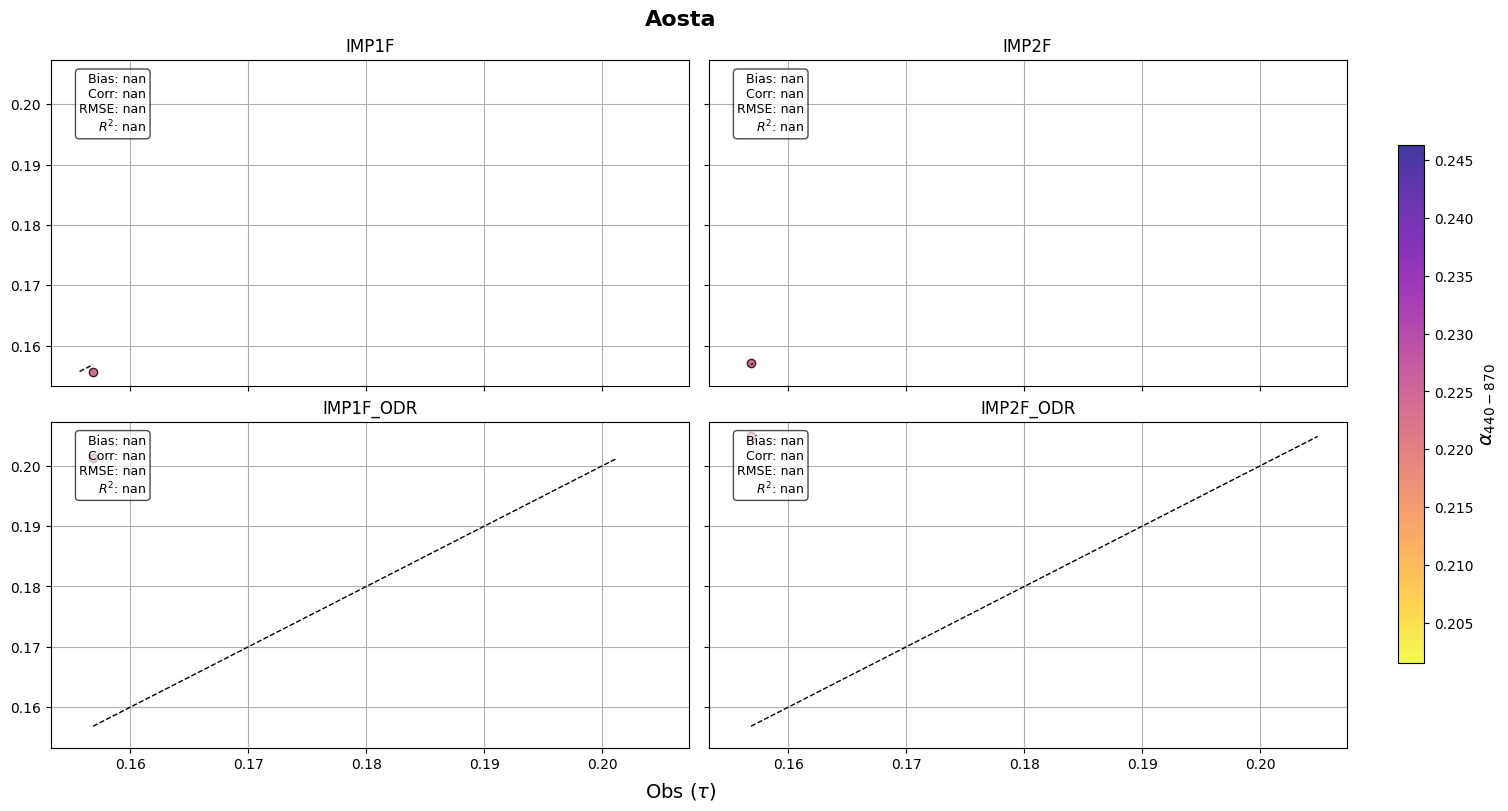

In [132]:
# DD events
aosta_dd = aosta_df[(aosta_df['LMP'] >= 0.15) & (aosta_df['ang_440_870'] <= 0.5)]
plot_scatter(
    aosta_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Aosta")

# **Apulian Tavoliere**

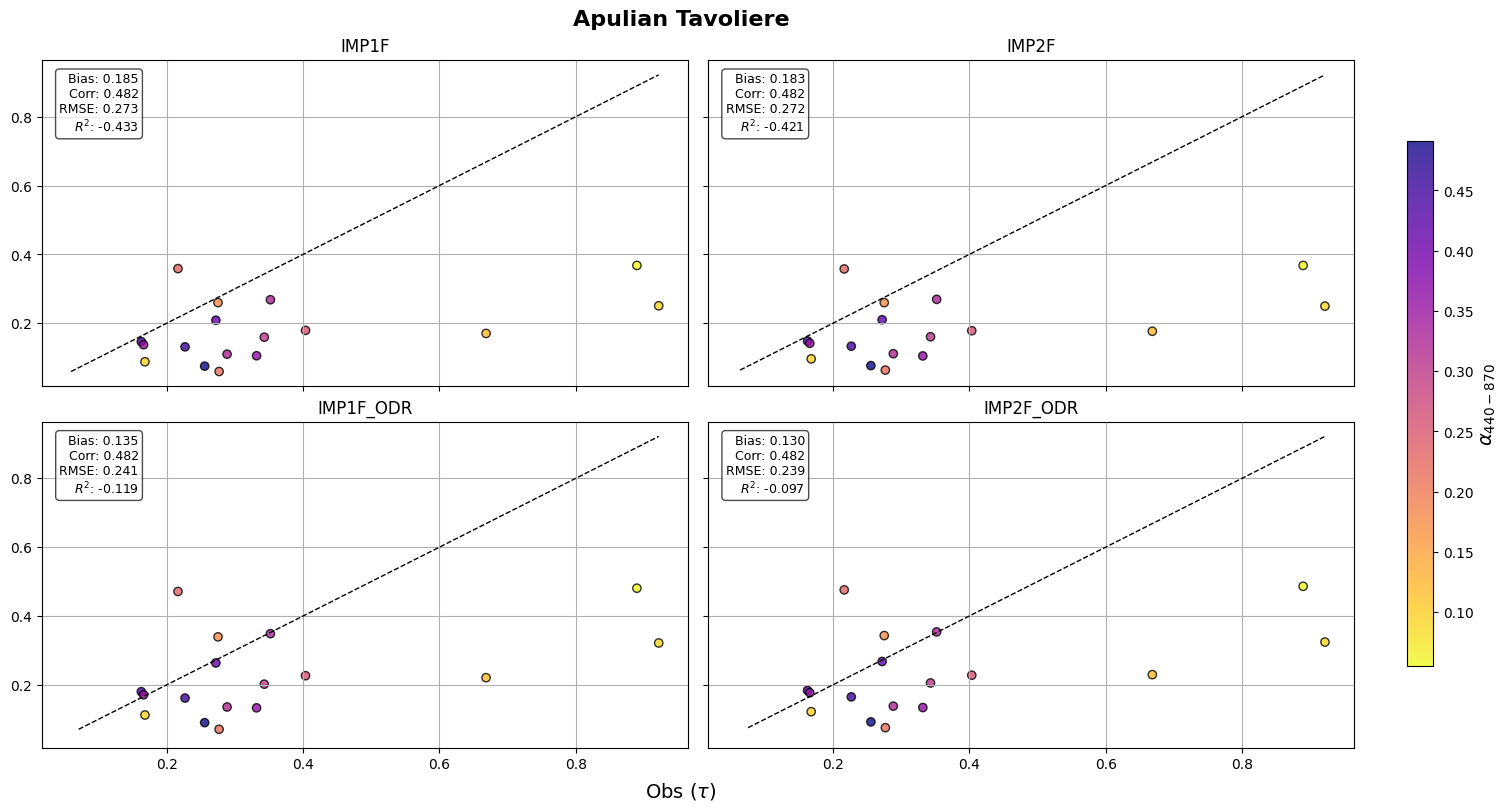

In [133]:
# DD events
apulian_tavoliere_dd = apulian_tavoliere_df[(apulian_tavoliere_df['LMP'] >= 0.15) & (apulian_tavoliere_df['ang_440_870'] <= 0.5)]
plot_scatter(
    apulian_tavoliere_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Apulian Tavoliere")

# **Capo Granitola**

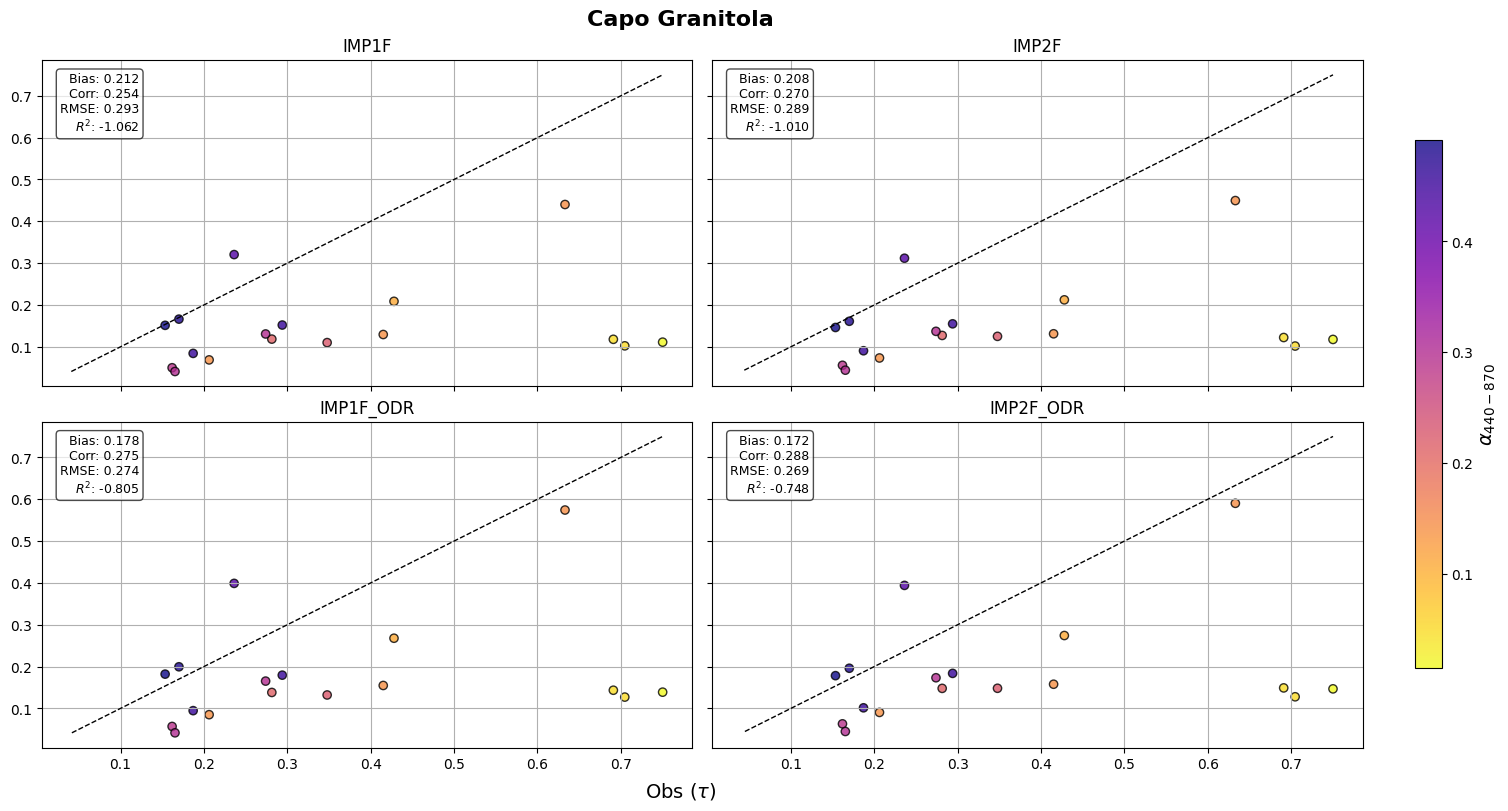

In [134]:
# DD events
capo_granitola_dd = capo_granitola_df[(capo_granitola_df['LMP'] >= 0.15) & (capo_granitola_df['ang_440_870'] <= 0.5)]
plot_scatter(
    capo_granitola_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Capo Granitola")

# **Ersa**

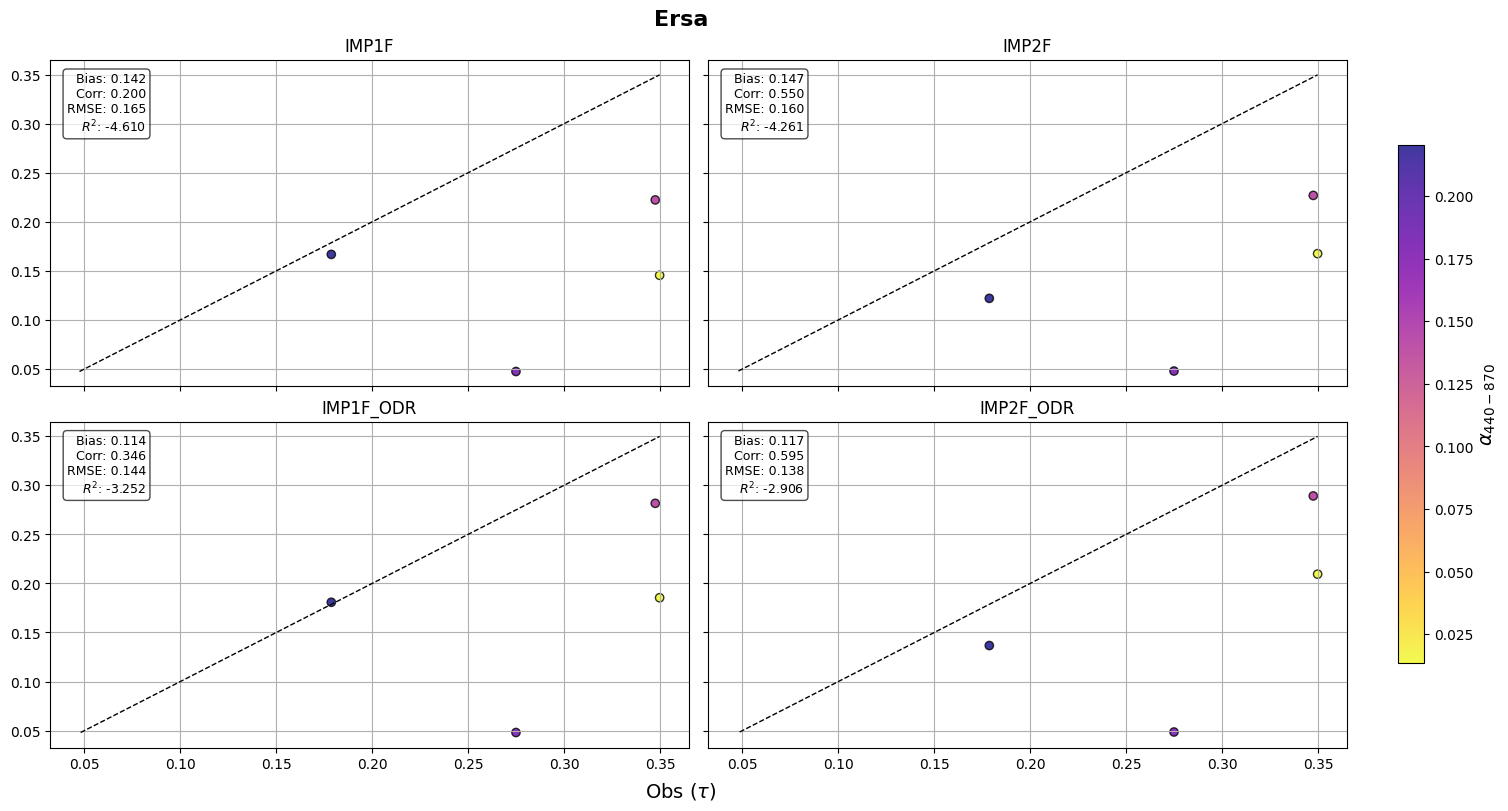

In [135]:
# DD events
ersa_dd = ersa_df[(ersa_df['LMP'] >= 0.15) & (ersa_df['ang_440_870'] <= 0.5)]
plot_scatter(
    ersa_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Ersa")

# **Lampedusa**

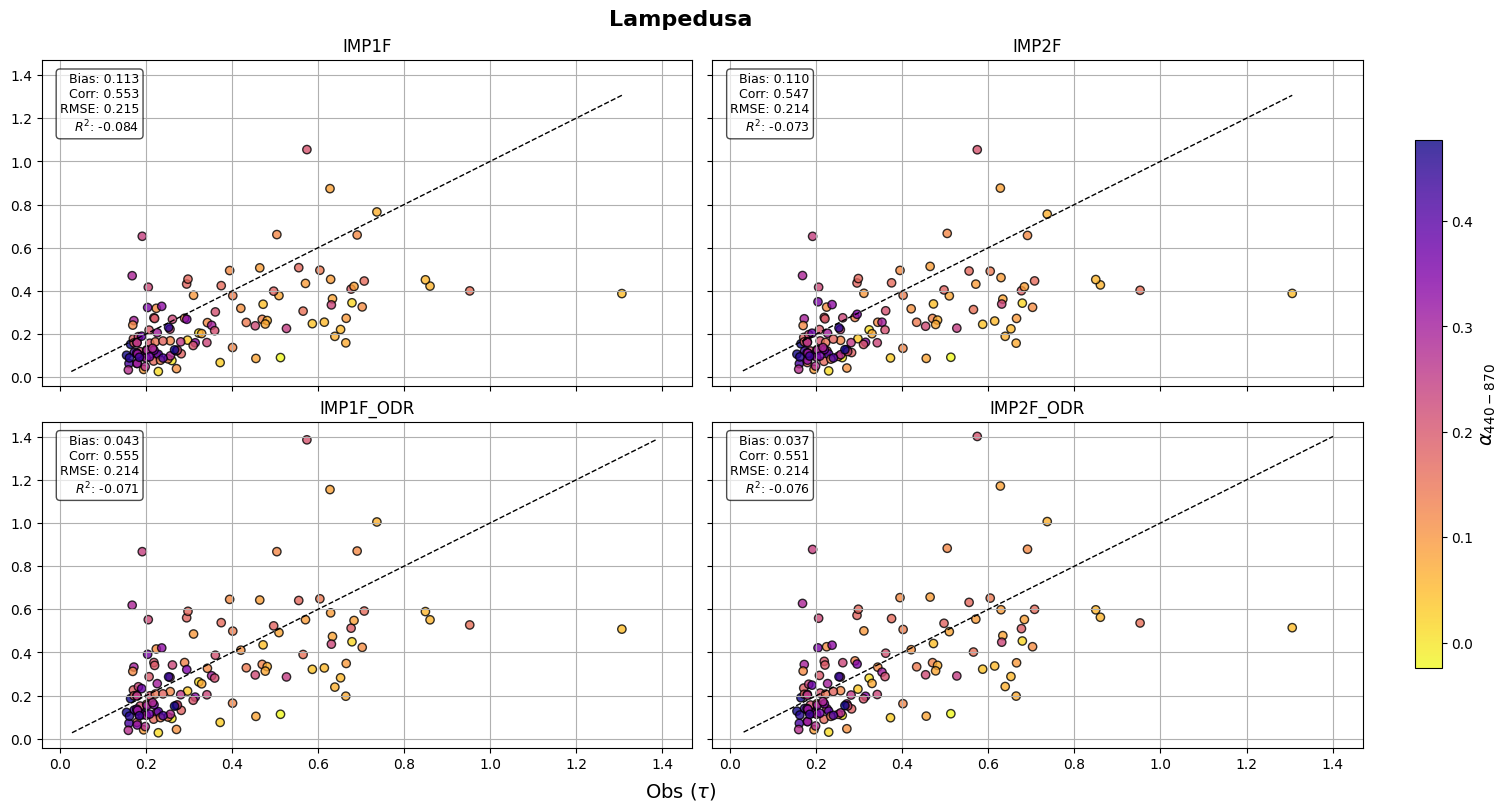

In [136]:
# DD events
lampedusa_dd = lampedusa_df[(lampedusa_df['LMP'] >= 0.15) & (lampedusa_df['ang_440_870'] <= 0.5)]
plot_scatter(
    lampedusa_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Lampedusa")

# **Modena**

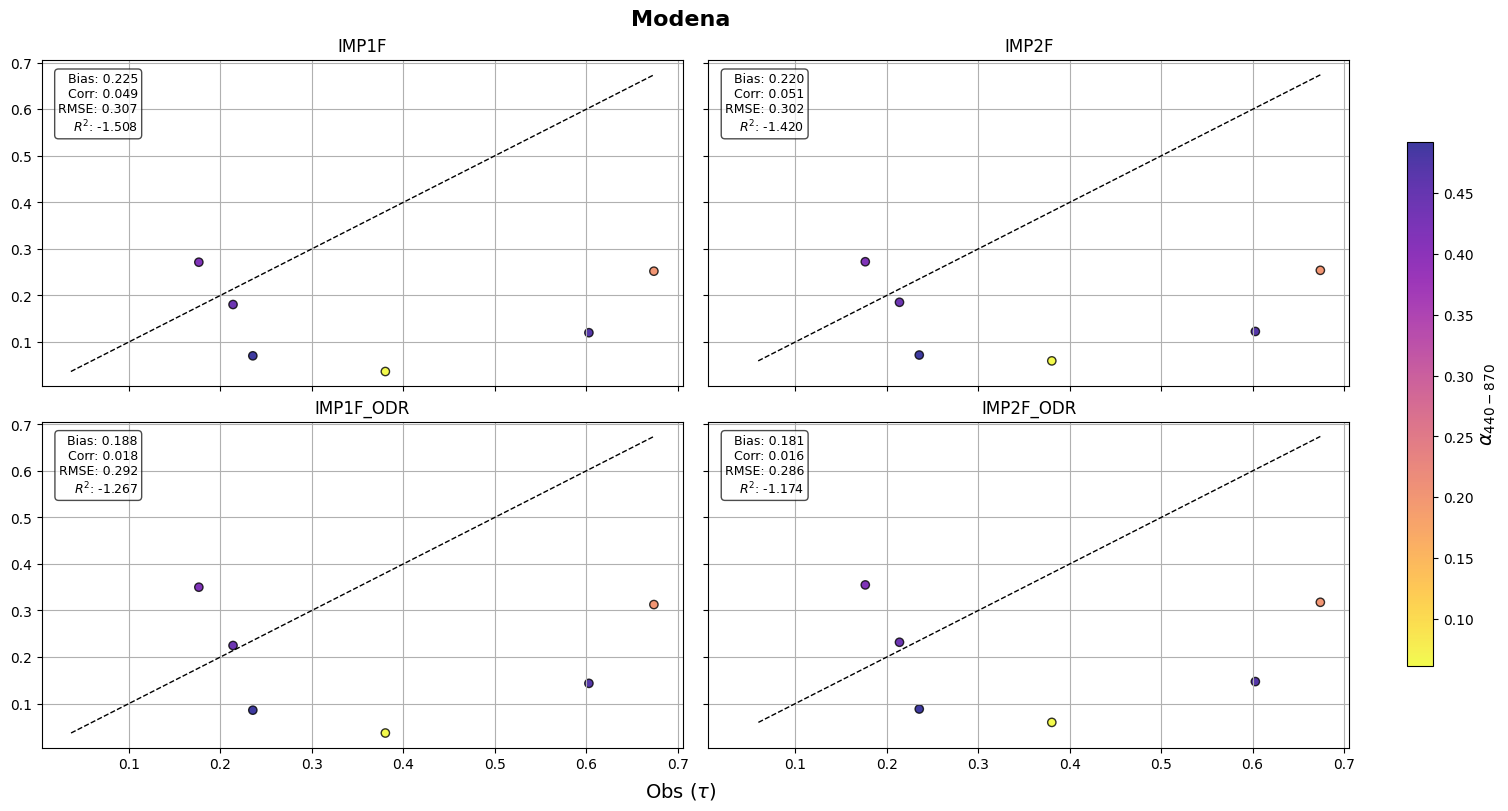

In [137]:
# DD events
modena_dd = modena_df[(modena_df['LMP'] >= 0.15) & (modena_df['ang_440_870'] <= 0.5)]
plot_scatter(
    modena_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Modena")

# **Napoli**

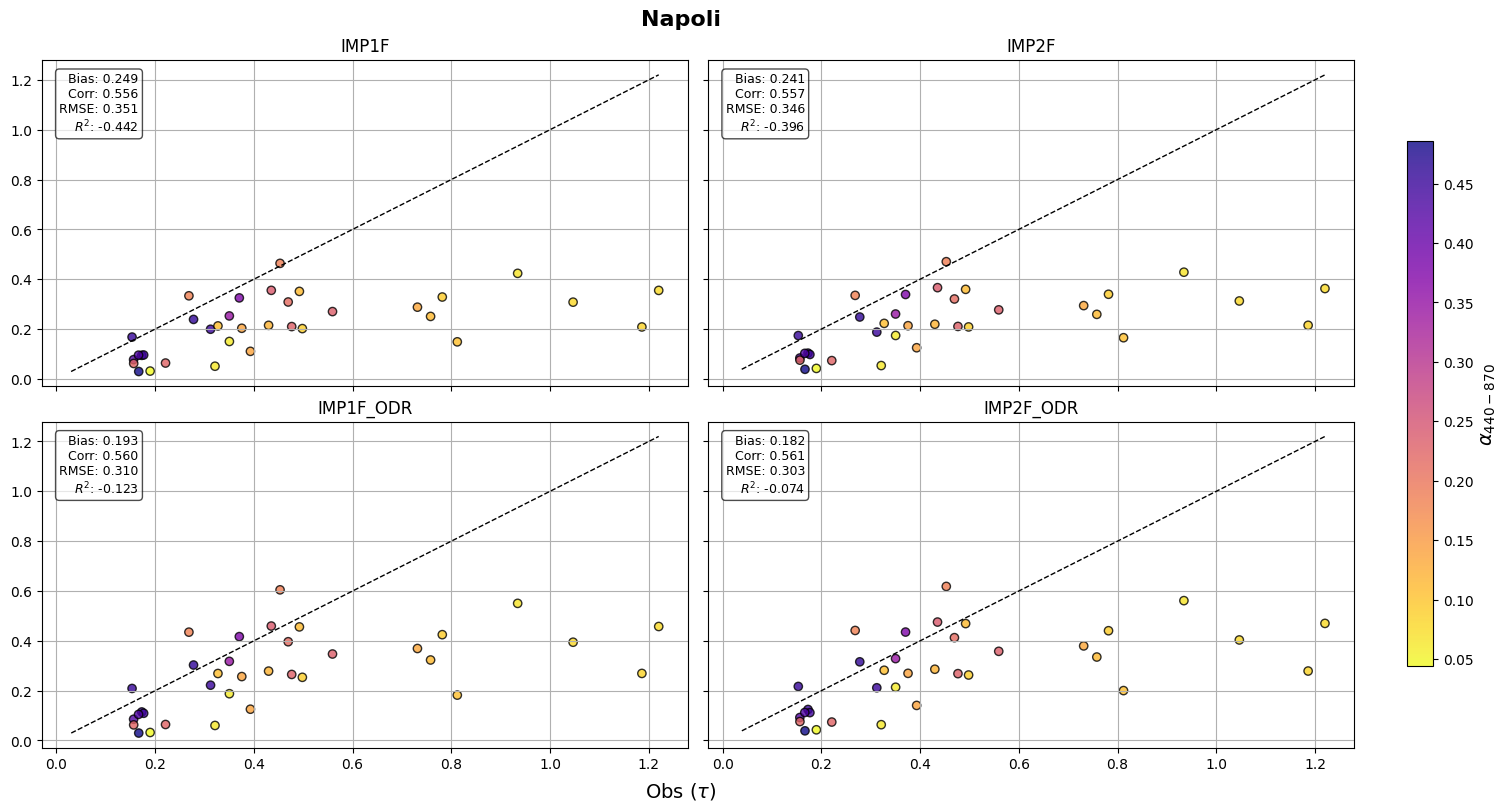

In [138]:
# DD events
napoli_dd = napoli_df[(napoli_df['LMP'] >= 0.15) & (napoli_df['ang_440_870'] <= 0.5)]
plot_scatter(
    napoli_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Napoli")

# **Potenza**

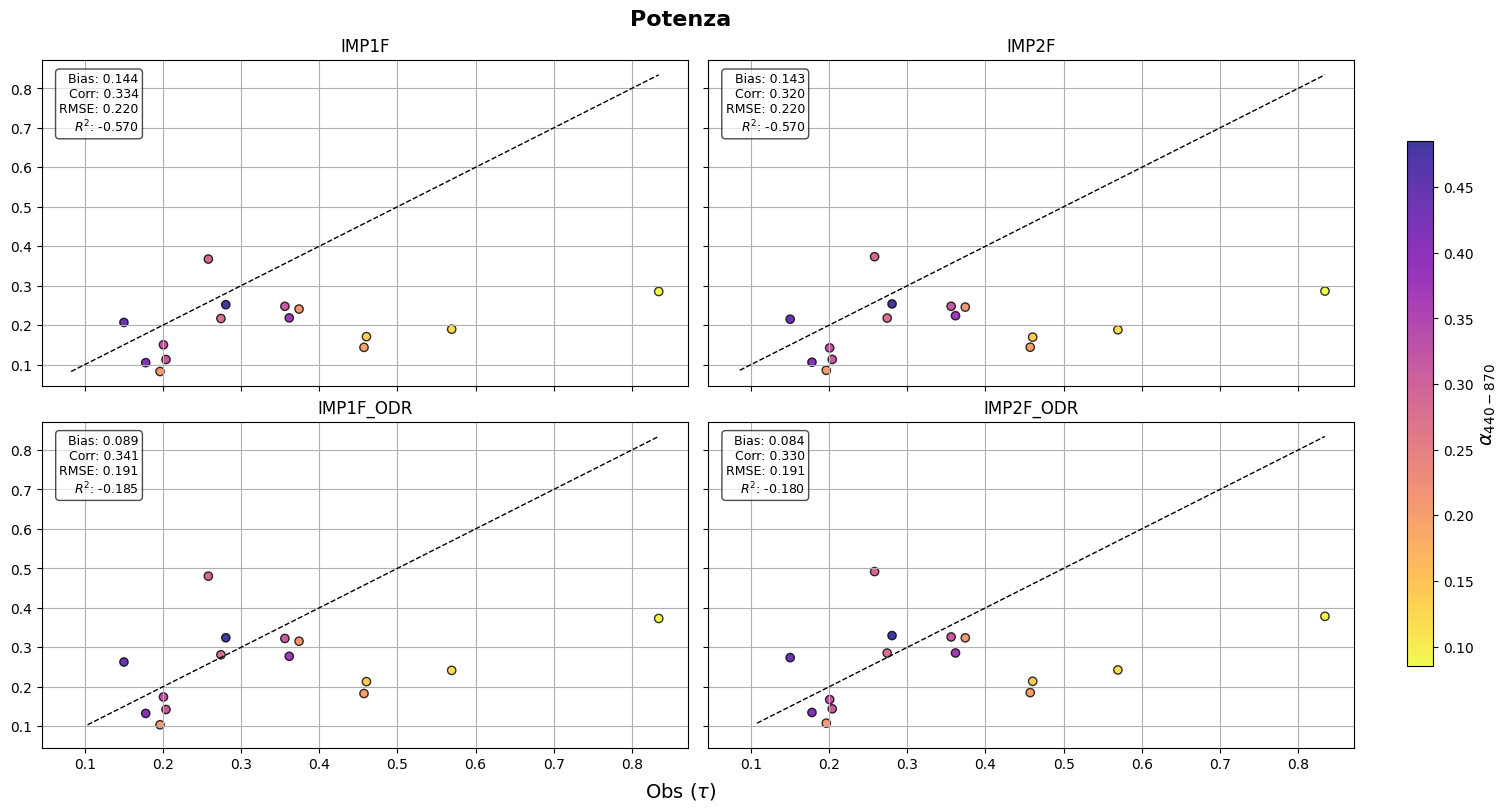

In [139]:
# DD events
potenza_dd = potenza_df[(potenza_df['LMP'] >= 0.15) & (potenza_df['ang_440_870'] <= 0.5)]
plot_scatter(
    potenza_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Potenza")

# **Roma La Sapienza**

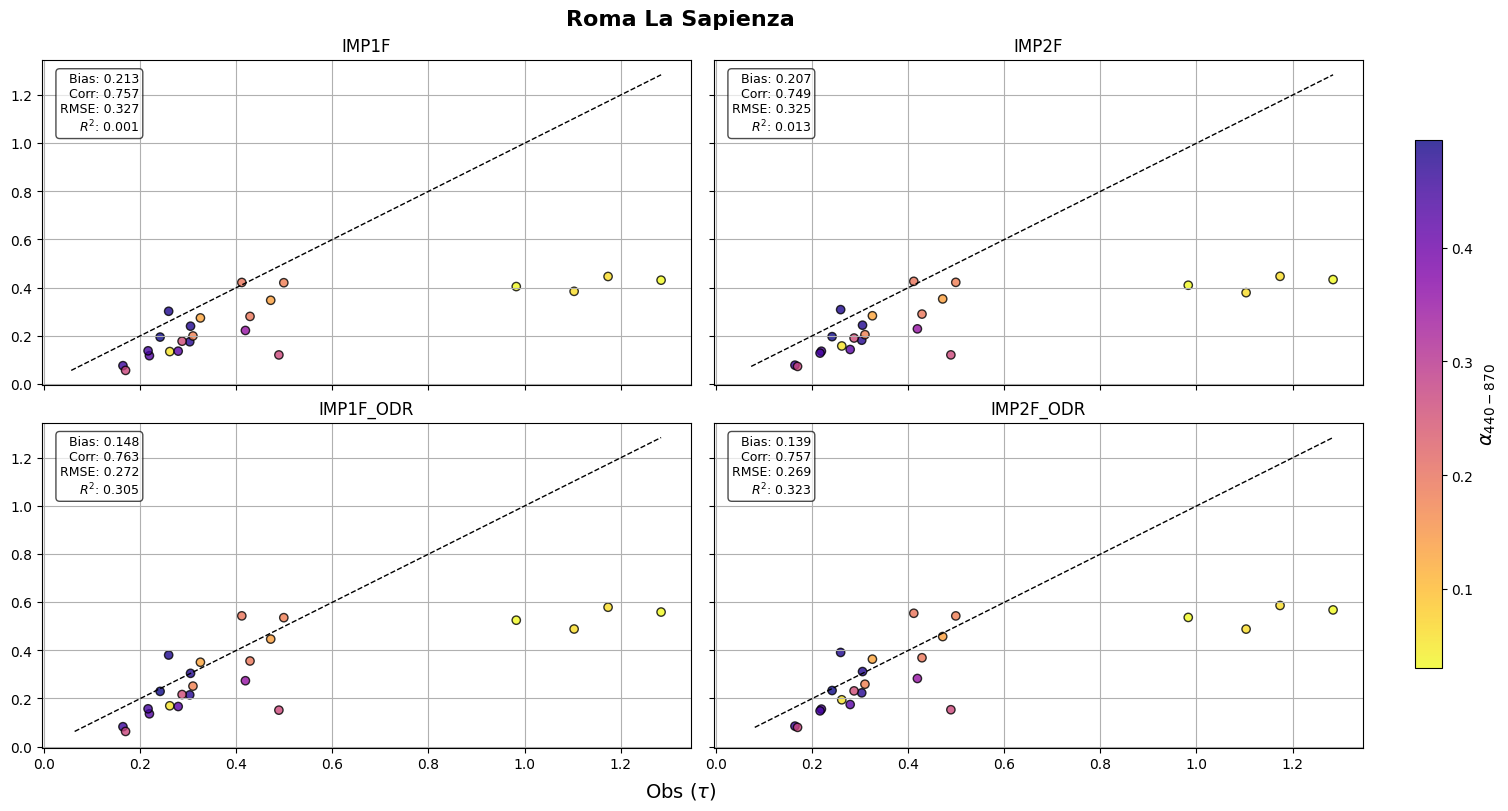

In [140]:
# DD events
roma_la_sapienza_dd = roma_la_sapienza_df[(roma_la_sapienza_df['LMP'] >= 0.15) & (roma_la_sapienza_df['ang_440_870'] <= 0.5)]
plot_scatter(
    roma_la_sapienza_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Roma La Sapienza")

# **Roma Tor Vergata**

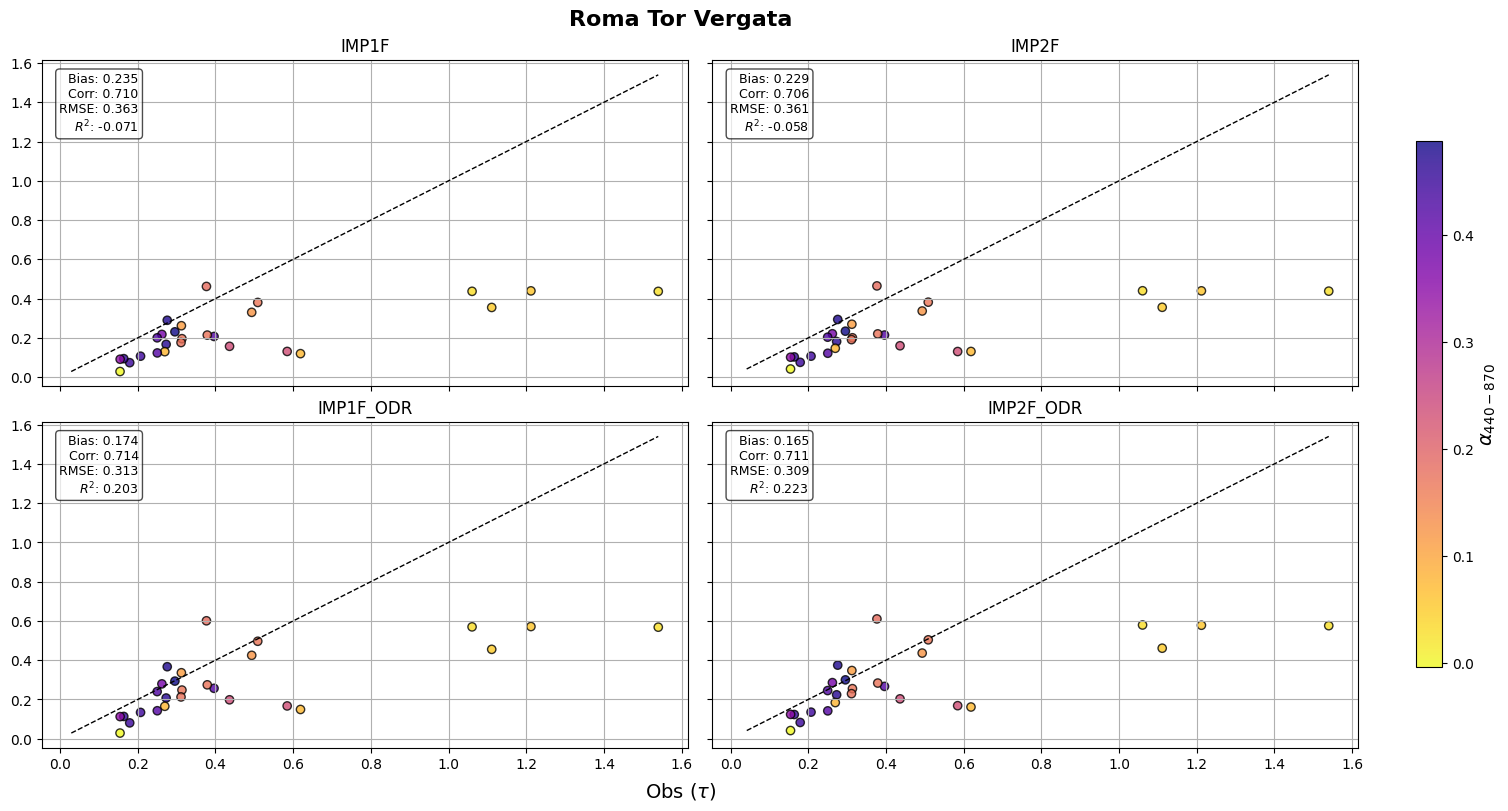

In [141]:
# DD events
roma_tor_vergata_dd = roma_tor_vergata_df[(roma_tor_vergata_df['LMP'] >= 0.15) & (roma_tor_vergata_df['ang_440_870'] <= 0.5)]
plot_scatter(
    roma_tor_vergata_dd,
    ['LMP', 'IMP1F', 'IMP2F', 'IMP1F_ODR', 'IMP2F_ODR', 'ang_440_870'],
    cmap='plasma_r',
    stats=True,
    name="Roma Tor Vergata")

# All DD events for each station

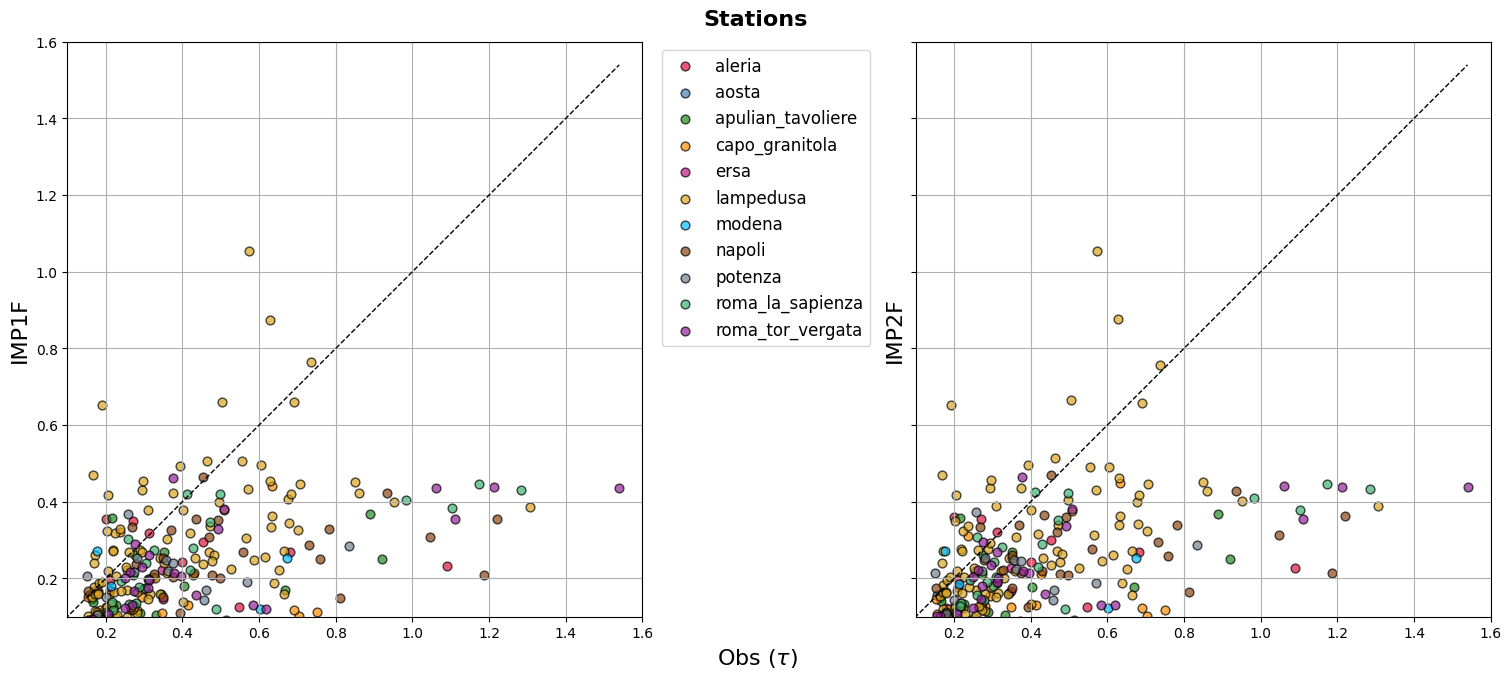

In [203]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True, sharex=False, sharey=True)

stations = {'aleria': aleria_dd,
            'aosta': aosta_dd,
            'apulian_tavoliere': apulian_tavoliere_dd,
            'capo_granitola': capo_granitola_dd,
            'ersa': ersa_dd,
            'lampedusa': lampedusa_dd,
            'modena': modena_dd,
            'napoli': napoli_dd,
            'potenza': potenza_dd,
            'roma_la_sapienza': roma_la_sapienza_dd,
            'roma_tor_vergata': roma_tor_vergata_dd
            }
colors = ['#DC143C', '#4682B4', '#228B22', '#FF8C00', '#C71585',
          '#DAA520', '#00BFFF', '#8B4513', '#708090', '#3CB371', "#93219B"]
columns = ['IMP1F', 'IMP2F']
obs = 'LMP'

for i, (ax, model_col) in enumerate(zip(axs, columns)):
    for (name, df), color in zip(stations.items(), colors):
        ax.scatter(df[obs], df[model_col], label=name, color=color, alpha=0.7, edgecolor='k', s=40)
    if i == 0:
        ax.set_xlabel(r'Obs ($\tau$)', fontsize=16, x=1.2)
    ax.set_ylabel(model_col, fontsize=16)
    ax.set_aspect('equal', adjustable='box')

    # # Optionally match axis limits (across all data) 
    all_vals = pd.concat([df[obs] for df in stations.values()] + 
                         [df[model_col] for df in stations.values()])
    min_val = all_vals.min()
    max_val = all_vals.max()
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1)
    ax.set_xlim(0.1, 1.6)
    ax.set_ylim(0.1, 1.6)

    ax.grid(True)

axs[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
plt.suptitle('Stations', y=0.9, fontsize= 16, fontweight='bold')
plt.show()